In [1]:
import pandas as pd
from plotnine import *

# Graph overview table
Table 7 in the paper is a per-graph filtered version of this table

In [2]:
denorm_metrics = pd.read_csv("out/metrics.csv")
denorm_metrics = denorm_metrics[(denorm_metrics["method"] == "denormalized") & (denorm_metrics["subset"] == "all") & (denorm_metrics["database"] == "neo4j")]
denorm_metrics = denorm_metrics[["graph","metric","value","database"]]
denorm_metrics.drop_duplicates(inplace=True, ignore_index=True)
denorm_metrics = pd.pivot(denorm_metrics, values="value", index="graph", columns=["metric"])

In [3]:
denorm_metrics

metric,$\mu_1$: NodeCount,$\mu_2$: EdgeCount,$\mu_3$: AvgNodePropCount,$\mu_4$: AvgEdgePropCount
graph,,,,
S01 - London Public Transport,651.0,1952.0,4.992320,3.000000
S02 - Northwind Orders,1035.0,3139.0,13.305314,3.432622
S03 - No Socks,3.0,2.0,3.333333,0.000000
S04 - No Socks,3.0,2.0,3.333333,0.000000
S05 - No Socks 2,3.0,2.0,3.333333,0.000000
S06 - Offshore,2016523.0,3339267.0,9.861893,3.250993
S07 - Offshore,2016523.0,3339267.0,9.861893,3.250993
S08 - Offshore,2016523.0,3339267.0,9.861893,3.250993
S09 - Rijden de Treinen,194179.0,1826601.0,6.983253,3.787839


# Redundancy change table
Table 8 in the paper is based on the methods "denormalized" and "all"

In [4]:
dep_metrics = pd.read_csv("out/per_dep_metrics.csv")
dep_metrics = dep_metrics[(dep_metrics['database']=="Neo4J") & ((dep_metrics['method'] == "denormalized") | (dep_metrics['method'] == "all"))]
dep_metrics = dep_metrics[['graph','database','method','dependency','m5_max_inc_count','m6_avg_inc_count','m7_minimality']]
dep_metrics = dep_metrics.groupby(["graph","method"]).mean(numeric_only=True)

In [6]:
dep_metrics

m5_max_inc_count  \
graph                         method                           
S01 - London Public Transport all                   1.000000   
                              denormalized        112.600000   
S02 - Northwind Orders        all                   1.000000   
                              denormalized         16.000000   
S03 - No Socks                all                   1.000000   
                              denormalized          1.250000   
S04 - No Socks                all                   1.000000   
                              denormalized          1.250000   
S05 - No Socks 2              all                   1.000000   
                              denormalized          1.200000   
S06 - Offshore                all                   1.000000   
                              denormalized     264881.333333   
S07 - Offshore                all                   1.000000   
                              denormalized     175898.000000   
S08 - Offshore                all                   1.000000   
                              denormalized     239572.200000   
S09 - Rijden de Treinen       all                   1.000000   
                              denormalized       6790.333333   
S10 - Rijden de Treinen       all                   1.000000   
                              denormalized      11631.000000   
S11 - University              all                   1.000000   
                              denormalized          3.000000   
S12 - University              all                   1.000000   
                              denormalized          3.000000   

                                            m6_avg_inc_count  m7_minimality  
graph                         method                                         
S01 - London Public Transport all                   1.000000       1.000000  
                              denormalized         36.423214       0.410151  
S02 - Northwind Orders        all                   1.000000       1.000000  
                              denormalized          5.162921       0.553076  
S03 - No Socks                all                   1.000000       1.000000  
                              denormalized          1.250000       0.750000  
S04 - No Socks                all                   1.000000       1.000000  
                              denormalized          1.250000       0.750000  
S05 - No Socks 2              all                   1.000000       1.000000  
                              denormalized          1.200000       0.800000  
S06 - Offshore                all                   1.000000       1.000000  
                              denormalized        613.066333       0.001824  
S07 - Offshore                all                   1.000000       1.000000  
                              denormalized        513.248456       0.002003  
S08 - Offshore                all                   1.000000       1.000000  
                              denormalized      21645.631621       0.001336  
S09 - Rijden de Treinen       all                   1.000000       1.000000  
                              denormalized        563.933377       0.683425  
S10 - Rijden de Treinen       all                   1.000000       1.000000  
                              denormalized        964.816115       0.585835  
S11 - University              all                   1.000000       1.000000  
                              denormalized          3.000000       0.000000  
S12 - University              all                   1.000000       1.000000  
                              denormalized          3.000000       0.000000

# Per graph metric changes
The dataframe below is the basis for table 11, which shwos a selection of those

In [25]:
per_graph_metrics = pd.read_csv("out/metrics.csv")
per_graph_metrics = per_graph_metrics[(per_graph_metrics["database"] == "neo4j")]
per_graph_metrics = per_graph_metrics[["graph","metric","value","method"]]
per_graph_metrics.drop_duplicates(inplace=True, ignore_index=True)
per_graph_metrics = pd.pivot(per_graph_metrics, values="value", index=["method","graph"], columns=["metric"])
per_graph_metrics.to_excel("out/per_graph_changes.xlsx")

In [26]:
baseline = per_graph_metrics.xs('denormalized', level='method')
rel_diff = (per_graph_metrics.div(baseline, level='graph') - 1) * 100
rel_diff = rel_diff.drop('denormalized', level='method')

In [27]:
rel_diff

metric                                   $\mu_1$: NodeCount  \
method    graph                                               
all       S01 - London Public Transport          305.069124   
          S02 - Northwind Orders                   8.599034   
          S03 - No Socks                         100.000000   
          S04 - No Socks                         166.666667   
          S05 - No Socks 2                       100.000000   
          S06 - Offshore                           0.042548   
          S07 - Offshore                           0.251869   
          S08 - Offshore                           0.042896   
          S09 - Rijden de Treinen               1781.226085   
          S10 - Rijden de Treinen               2622.099712   
          S11 - University                         0.000000   
          S12 - University                        25.000000   
edge-left S01 - London Public Transport          302.764977   
          S02 - Northwind Orders                   0.000000   
          S03 - No Socks                           0.000000   
          S04 - No Socks                           0.000000   
          S05 - No Socks 2                         0.000000   
          S06 - Offshore                           0.000000   
          S07 - Offshore                           0.000000   
          S08 - Offshore                           0.000000   
          S09 - Rijden de Treinen               1681.747254   
          S10 - Rijden de Treinen               2522.897945   
          S11 - University                         0.000000   
          S12 - University                         0.000000   
node-left S01 - London Public Transport            2.304147   
          S02 - Northwind Orders                   8.599034   
          S03 - No Socks                         100.000000   
          S04 - No Socks                         166.666667   
          S05 - No Socks 2                       100.000000   
          S06 - Offshore                           0.042548   
          S07 - Offshore                           0.251869   
          S08 - Offshore                           0.042896   
          S09 - Rijden de Treinen                 99.478831   
          S10 - Rijden de Treinen                 99.478831   
          S11 - University                         0.000000   
          S12 - University                        25.000000   

metric                                   $\mu_2$: EdgeCount  \
method    graph                                               
all       S01 - London Public Transport          232.120902   
          S02 - Northwind Orders                  26.441542   
          S03 - No Socks                         200.000000   
          S04 - No Socks                         300.000000   
          S05 - No Socks 2                       150.000000   
          S06 - Offshore                          10.259647   
          S07 - Offshore                          45.368160   
          S08 - Offshore                          30.778940   
          S09 - Rijden de Treinen                278.800625   
          S10 - Rijden de Treinen                457.580774   
          S11 - University                         0.000000   
          S12 - University                        33.333333   
edge-left S01 - London Public Transport          199.077869   
          S02 - Northwind Orders                   0.000000   
          S03 - No Socks                           0.000000   
          S04 - No Socks                           0.000000   
          S05 - No Socks 2                         0.000000   
          S06 - Offshore                           0.000000   
          S07 - Offshore                           0.000000   
          S08 - Offshore                           0.000000   
          S09 - Rijden de Treinen                178.780150   
          S10 - Rijden de Treinen                446.950374   
          S11 - University                         0.000000   
          S12 - University    

In [28]:
plot_df = rel_diff.reset_index()
plot_df = plot_df.melt(id_vars=['method', 'graph'], var_name='metric', value_name='percentage_diff')
#plot_df = plot_df[(plot_df["graph"].str.contains("London")) | (plot_df["graph"].str.contains("Rijden"))]
plot_df

,method,graph,metric,percentage_diff
0,all,S01 - London Public Transport,$\mu_1$: NodeCount,305.069124
1,all,S02 - Northwind Orders,$\mu_1$: NodeCount,8.599034
2,all,S03 - No Socks,$\mu_1$: NodeCount,100.000000
3,all,S04 - No Socks,$\mu_1$: NodeCount,166.666667
4,all,S05 - No Socks 2,$\mu_1$: NodeCount,100.000000
...,...,...,...,...
139,node-left,S08 - Offshore,$\mu_4$: AvgEdgePropCount,-23.535089
140,node-left,S09 - Rijden de Treinen,$\mu_4$: AvgEdgePropCount,-33.472427
141,node-left,S10 - Rijden de Treinen,$\mu_4$: AvgEdgePropCount,-33.472427
142,node-left,S11 - University,$\mu_4$: AvgEdgePropCount,-50.000000


In [29]:
method_order = (
    plot_df.groupby('method')['percentage_diff']
    .mean()
    .sort_values(ascending=True)
    .index.tolist()
)
#plot_df['method'] = pd.Categorical(plot_df['method'], categories=method_order, ordered=True)
plot_df["graph"] = plot_df["graph"].str.slice(0,3)
plot1_df=plot_df[(plot_df["method"]=="all")]
plot2_df=plot_df[(plot_df["method"]=="edge-left") & ((plot_df["graph"].str.contains("S01")) | (plot_df["graph"].str.contains("S10")) | (plot_df["graph"].str.contains("S09")))]
plot3_df=plot_df[(plot_df["method"]=="node-left") & ((plot_df["graph"].str.contains("S01")) | (plot_df["graph"].str.contains("S10")) | (plot_df["graph"].str.contains("S09")))]



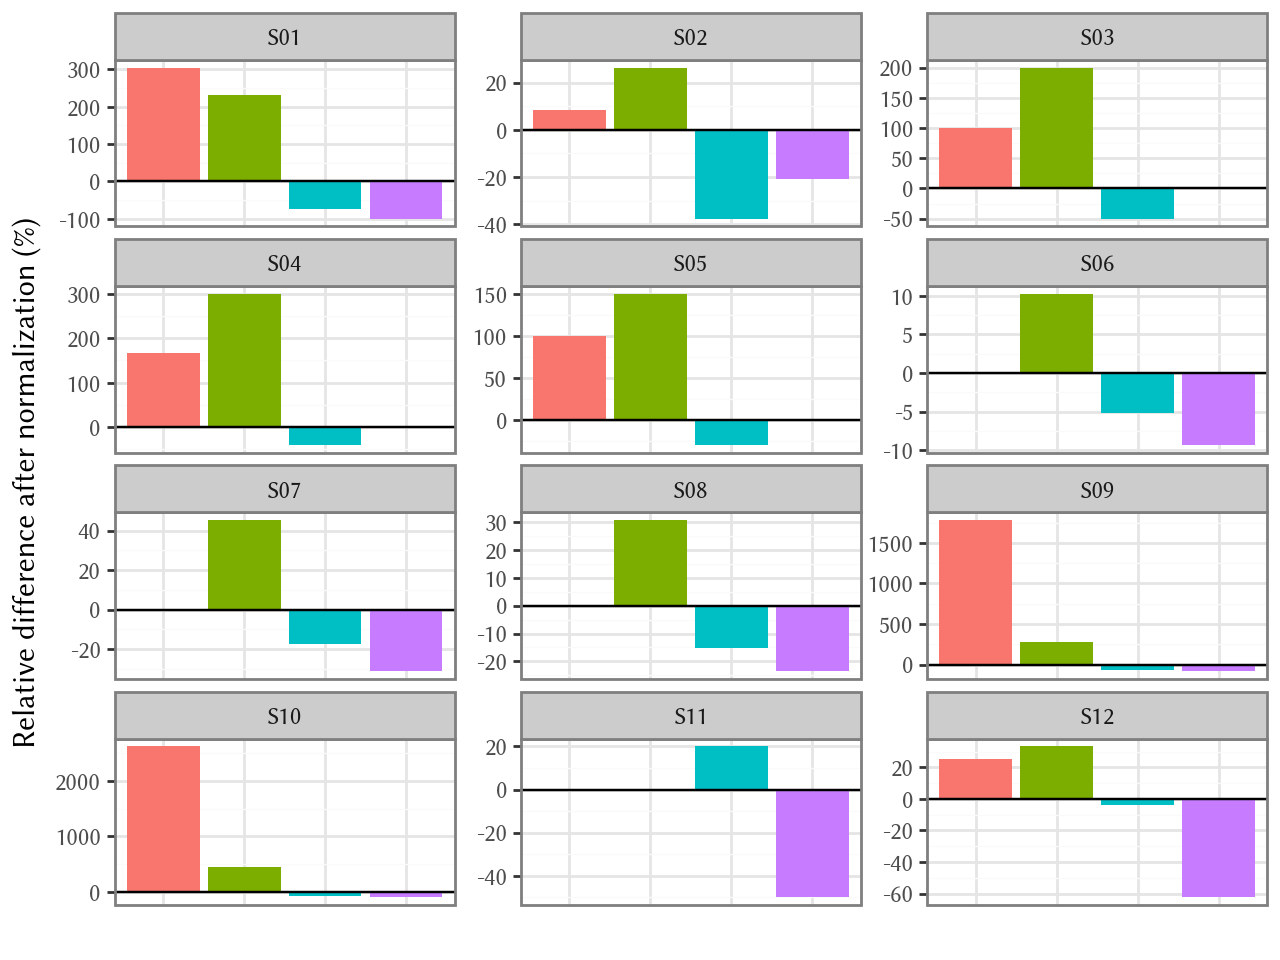

In [30]:
plot1 = (
    ggplot(plot1_df, aes(x='metric', y='percentage_diff', fill='metric'))
    + geom_col()
    + geom_hline(yintercept=0, color="black")
    + facet_wrap('graph', scales='free_y', ncol=3)
    + labs(
   #     subtitle="0% represents the denormalized baseline",
        y="Relative difference after normalization (%)",
        x=" ",
        fill="Statistic"
    )
    + theme_bw()
    + theme(text=element_text(family='Libertinus Sans'),
            plot_background=element_rect(fill='white'),
            axis_text_x=element_blank(),
            axis_ticks_major_x=element_blank(),
            legend_position='none')
)
plot1.show()


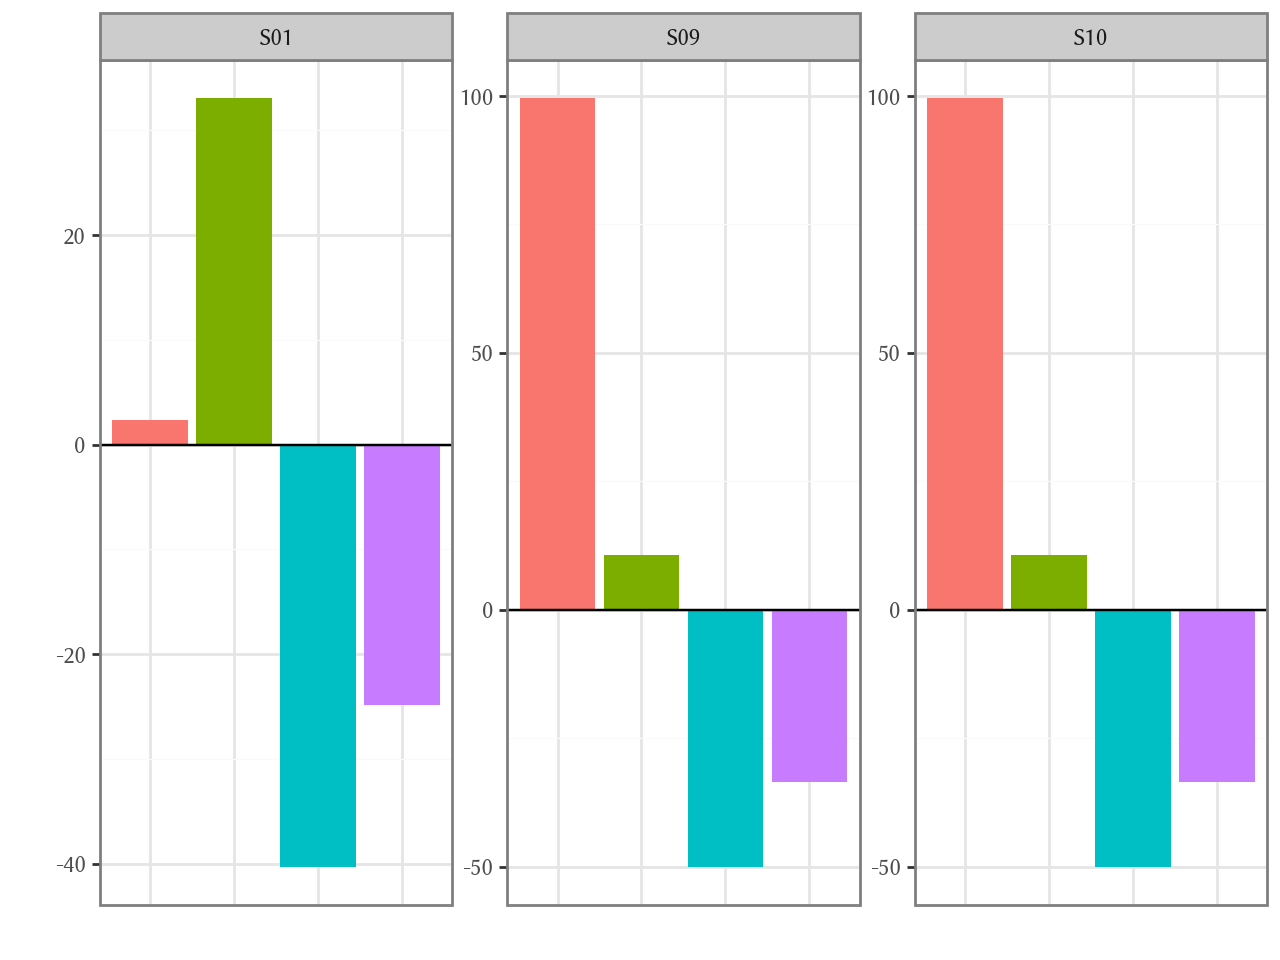

In [31]:
plot2 = (
    ggplot(plot2_df, aes(x='metric', y='percentage_diff', fill='metric'))
    + geom_col()
    + geom_hline(yintercept=0, color="black")
    + facet_wrap('graph', scales='free_y', ncol=3)
    + labs(
  #      y="Relative difference after normalization (%)",
        y=" ",
        x=" ",
        fill="Statistic"
    )
    + theme_bw()
    + theme(text=element_text(family='Libertinus Sans'),
            plot_background=element_rect(fill='white', color=None),
            axis_text_x=element_blank(),
            axis_ticks_major_x=element_blank(),
            legend_position='none')
)
plot2.show()
plot3 = (
    ggplot(plot3_df, aes(x='metric', y='percentage_diff', fill='metric'))
    + geom_col()
    + geom_hline(yintercept=0, color="black")
    + facet_wrap('graph', scales='free_y', ncol=3)
    + labs(
   #     y="Relative difference after normalization (%)",
        y=" ",
        x=" ",
        fill="Statistic"
    )
    + theme_bw()
    + theme(text=element_text(family='Libertinus Sans'),
            plot_background=element_rect(fill='white'),
            axis_text_x=element_blank(),
            axis_ticks_major_x=element_blank(),
            legend_position='none')
)
plot3.show()

In [32]:
plot1.save("out/changes_all.pdf", width=12, height=12, units="cm")
plot2.save("out/changes_edge-left.pdf", width=12, height=4, units="cm")
plot3.save("out/changes_node-left.pdf", width=12, height=4, units="cm")


/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 12.0 x 3.9999999999999996 cm image.
/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: out/changes_edge-left.pdf
/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 12.0 x 3.9999999999999996 cm image.
/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: out/changes_node-left.pdf


In [33]:
legend_only_plot = (
    ggplot(plot3_df, aes(x='metric', y='percentage_diff', fill='metric'))
    + geom_blank() # Tells plotnine to reserve space but draw nothing
    + geom_rect(aes(xmin=0, xmax=0, ymin=0, ymax=0)) # Force mapping for the legend
    + labs(fill="Methods")
    + theme_void() # Removes axes, grids, and background
    + theme(
        text=element_text(family='Libertinus Sans'),
        legend_background=element_rect(fill='white', color=None),
        plot_background=element_rect(fill='white',color=None),
        panel_background=element_rect(fill='white', color=None),
        legend_direction='horizontal',
        legend_box='horizontal',
        figure_size=(0, 0) # Small square for just the legend
    )

)

# Save the legend
legend_only_plot.save("out/legend_only.pdf", bbox_inches='tight', width=18, height=1, units="cm")

/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 18.0 x 0.9999999999999999 cm image.
/Users/jschrott/Repositories/global-lpg-norm/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: out/legend_only.pdf


# Time

In [34]:
per_graph_metrics = pd.read_csv("out/metrics.csv")
per_graph_metrics = per_graph_metrics[(per_graph_metrics["database"] == "neo4j") & (per_graph_metrics["subset"] == "all")]
per_graph_metrics = per_graph_metrics[["graph", "method", "timestamp"]]
per_graph_metrics.drop_duplicates(inplace=True, ignore_index=True)
per_graph_metrics = pd.pivot(per_graph_metrics, values="timestamp", index=["graph"], columns=["method"])
per_graph_metrics["duration_in_sec"] = (pd.to_datetime(per_graph_metrics["all"])-pd.to_datetime(per_graph_metrics["denormalized"])).dt.total_seconds()


In [35]:
per_graph_metrics

method,all,denormalized,duration_in_sec
graph,,,
S01 - London Public Transport,2026-02-04 10:13:55.360266120,2026-02-04 10:13:54.303769948,1.056496
S02 - Northwind Orders,2026-02-04 10:11:15.825448315,2026-02-04 10:11:15.226319390,0.599129
S03 - No Socks,2026-02-04 10:03:30.809388109,2026-02-04 10:03:29.912862950,0.896525
S04 - No Socks,2026-02-04 10:06:04.228640804,2026-02-04 10:06:03.202605060,1.026036
S05 - No Socks 2,2026-02-04 10:08:33.911837991,2026-02-04 10:08:32.824436364,1.087402
S06 - Offshore,2026-02-04 09:37:43.516419919,2026-02-04 09:37:31.079248520,12.437171
S07 - Offshore,2026-02-04 09:44:43.764266390,2026-02-04 09:43:48.791294063,54.972972
S08 - Offshore,2026-02-04 09:52:47.338044368,2026-02-04 09:52:13.059334478,34.278710
S09 - Rijden de Treinen,2026-02-04 09:19:10.727577191,2026-02-04 09:17:40.978135453,89.749442
